## Arbitrary Value Imputation

This technique was derived from Kaggle competetion.

It consists of replacing NAN by an arbitrary value 

In [6]:
import pandas as pd
df = pd.read_csv("train.csv", usecols=["Age", "Fare", "Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


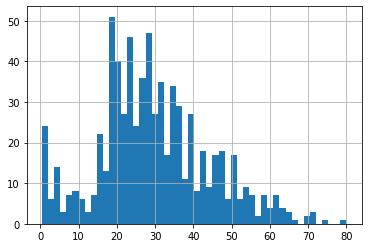

In [9]:
df['Age'].hist(bins=50)

In [10]:
## Arbitrary values
## It should be more frequently  present

### How to handle categorical  missing values

#### Frequent Category Impututatiom

In [11]:
df=pd.read_csv("train-house.csv", usecols=["BsmtQual", "FireplaceQu", "GarageType", "SalePrice"])
df.head()


,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [12]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [14]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

## Compute the frequency with every feature

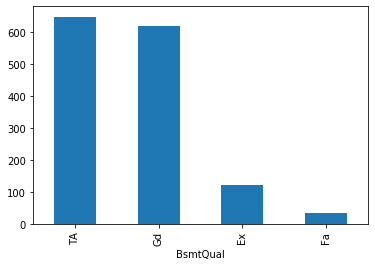

In [21]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

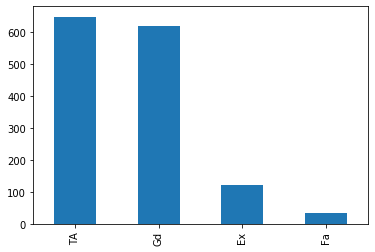

In [23]:
df['BsmtQual'].value_counts().plot.bar()

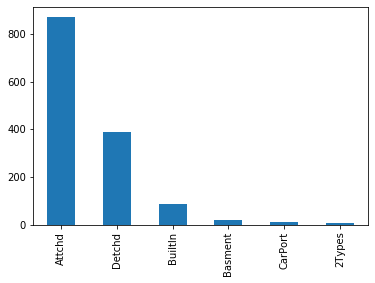

In [24]:
df['GarageType'].value_counts().plot.bar()

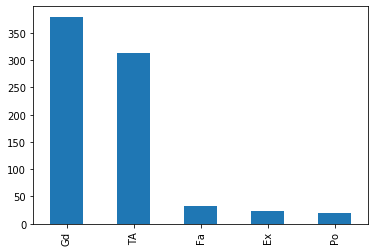

In [25]:
df['FireplaceQu'].value_counts().plot.bar()

### Replacing Function


In [27]:
def impute_nan(df, variable):
    most_frequent_category=df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category, inplace=True)

In [30]:
for feature in ['BsmtQual', 'FireplaceQu', 'GarageType']:
    impute_nan(df,feature)

In [31]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

### Adding a variable to capture NAN

In [36]:
df=pd.read_csv("train-house.csv", usecols=["BsmtQual", "FireplaceQu", "GarageType", "SalePrice"])
df.head()


,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [37]:
import numpy as np
df['BsmtQual_Var'] = np.where(df['BsmtQual'].isnull(),1,0)

In [38]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [40]:
frequent=df['BsmtQual'].mode()[0]

In [45]:
df['BsmtQual'].fillna(frequent, inplace=True) 

In [46]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [47]:
df['FireplaceQu_Var'] = np.where(df['FireplaceQu'].isnull(),1,0)
frequent=df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent, inplace=True) 

In [48]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var,FireplaceQu_Var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


### Suppose if you have more frequent categories, we just replace NAN with a new category

In [50]:
df=pd.read_csv("train-house.csv", usecols=["BsmtQual", "FireplaceQu", "GarageType", "SalePrice"])
df.head()



,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [53]:
def impute_nan(df, variable):
    df[variable+ "newvar"]=np.where(df[variable].isnull(), 'Missing' , df[variable])

In [54]:
for feature in ['BsmtQual', 'FireplaceQu', 'GarageType']:
    impute_nan(df,feature)

In [55]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [57]:
df=df.drop(['BsmtQual', 'FireplaceQu', 'GarageType'], axis=1)

In [58]:
df.head()

,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
